# Data Prepocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('creditscores_dataset.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
# deal with categorical data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
OE.fit(data[['Requested Credit Amount','Number of Dependents','Monthly Income','Monthly Expense']])
data[['Requested Credit Amount','Number of Dependents','Monthly Income',
      'Monthly Expense']] = OE.transform(data[['Requested Credit Amount', 'Number of Dependents',
                                               'Monthly Income','Monthly Expense']])

marital = pd.get_dummies(data['Marital Status'])
data = pd.concat((data, marital), axis=1)
data = data.drop('Marital Status',axis =1)

data['Credit Rating'] = le.fit_transform(data['Credit Rating'])

In [5]:
data

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Credit Rating,Married,Not specified,Single
0,1,1.0,2.0,4.0,4.0,1,1,0,0
1,2,1.0,2.0,4.0,4.0,1,0,0,1
2,1,1.0,2.0,4.0,4.0,1,0,0,1
3,3,1.0,2.0,4.0,4.0,1,1,0,0
4,3,1.0,2.0,4.0,4.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8076,3,1.0,0.0,3.0,3.0,1,1,0,0
8077,3,2.0,0.0,3.0,3.0,0,1,0,0
8078,3,2.0,1.0,3.0,3.0,1,1,0,0
8079,7,2.0,0.0,3.0,3.0,1,1,0,0


# Dimension reduction using PCA


In [6]:
#import useful libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('ggplot')

In [7]:
#our dataset have 8 features, and "Credit Rating" is the y variable
Y = data['Credit Rating']
data.drop('Credit Rating', axis=1, inplace= True)
X = data.values
X.shape

(8081, 8)

#### before apply PCA, we need to standardlize the data

In [8]:
scaler = StandardScaler().fit(X)
# Transform the values
X_scaled = scaler.transform(X)

In [9]:
# check: with all features, we can explain all
pca_9 = PCA(n_components=8, random_state=2000)
pca_9.fit(X_scaled)
X_pca_9 = pca_9.transform(X_scaled)
np.cumsum(pca_9.explained_variance_ratio_*100)

array([ 31.31033195,  49.37161972,  62.52964464,  74.81554449,
        85.41162365,  93.30025079, 100.        , 100.        ])

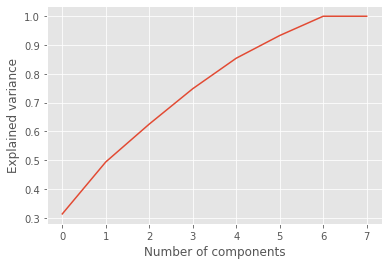

In [10]:

plt.plot(np.cumsum(pca_9.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plt.png', dpi=100)

In [11]:
print("Variance explained by the First principal component =", np.cumsum(pca_9.explained_variance_ratio_*100)[0])
print("Variance explained by the First 2 principal component =", np.cumsum(pca_9.explained_variance_ratio_*100)[1])
print("Variance explained by the First 3 principal component =", np.cumsum(pca_9.explained_variance_ratio_*100)[2])
print("Variance explained by the First 4 principal component =", np.cumsum(pca_9.explained_variance_ratio_*100)[3])
print("Variance explained by the First 5 principal component =", np.cumsum(pca_9.explained_variance_ratio_*100)[4])

Variance explained by the First principal component = 31.310331946272825
Variance explained by the First 2 principal component = 49.3716197232273
Variance explained by the First 3 principal component = 62.529644637482875
Variance explained by the First 4 principal component = 74.81554448854823
Variance explained by the First 5 principal component = 85.41162365405695


#### *85.41* is a great percentage, which means the using 5 variables can explain 85.41% of the dataset. We will use 85 for the following process.

## PCA set n=0.85


In [12]:
pca_85p = PCA(n_components=.85, random_state=2000)
pca_85p.fit(X_scaled)
X_pca_85p = pca_85p.transform(X_scaled) #store into 
X_pca_85p.shape # check shape with 5 features

(8081, 5)

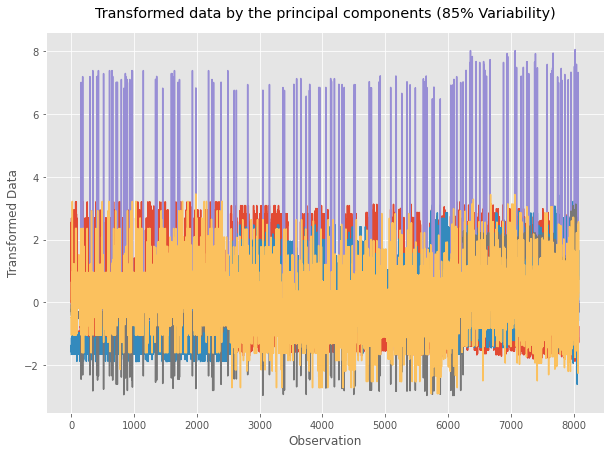

In [13]:
#plot
plt.figure(figsize=(10, 7))
plt.plot(X_pca_85p)
plt.xlabel('Observation')
plt.ylabel('Transformed Data')
plt.title('Transformed data by the principal components (85% Variability)', pad=15)
plt.savefig('plot.png')

In [14]:
#visualize our resulted pc variables
data_new = pd.DataFrame(X_pca_85p,columns=['PC1', 'PC2','PC3','PC4', 'PC5'])
data_new.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.285418,-1.658698,-0.097113,-0.288784,-0.483411
1,2.556303,-1.364466,-0.110713,-0.141905,-0.481343
2,2.427508,-1.595491,-0.018489,-0.074291,-1.048368
3,-0.027827,-1.196647,-0.281560,-0.424012,0.650641
4,2.685099,-1.133441,-0.202936,-0.209519,0.085683


# split data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new, Y, test_size=0.30, random_state=10)

## MLP Classifier

In [16]:
#import libraries
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

In [17]:
MLP = MLPClassifier(hidden_layer_sizes=(2,2,2,2,2),max_iter=10000,solver='sgd',
                         activation='relu',random_state=1)
MLP.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(2, 2, 2, 2, 2), max_iter=10000,
              random_state=1, solver='sgd')

In [18]:
k_folds = KFold(n_splits=10)
scores = cross_val_score(MLP, X_test, y_test, cv = k_folds)
scores

array([0.81893004, 0.85596708, 0.88888889, 0.88065844, 0.81481481,
       0.8677686 , 0.86363636, 0.87603306, 0.88429752, 0.85123967])

In [19]:
scores.mean()

0.8602234465870829

In [20]:
y_pred_pos = MLP.predict_proba(X_test)
y_pred_pos = y_pred_pos[:,1]
threshold_cl = np.arange(0,1,0.01).tolist()
print(y_pred_pos)

[0.8712402  0.86582524 0.86717428 ... 0.85654694 0.86582524 0.82831499]


In [21]:
max(y_pred_pos)

0.8950349521939096

In [22]:
min(y_pred_pos)

0.8243896497556097

In [23]:
f1_list_cl = []
for i in range(len(threshold_cl)):
  y_pred_class = y_pred_pos > threshold_cl[i]
  f1_list_cl.append(f1_score(y_test, y_pred_class))

In [24]:
f1_array_cl = np.array(f1_list_cl)
print(f1_array_cl.max())
print(f1_array_cl.argmax())
print(threshold_cl[f1_array_cl.argmax()])

0.924850365772556
0
0.0


Text(0, 0.5, 'f1')

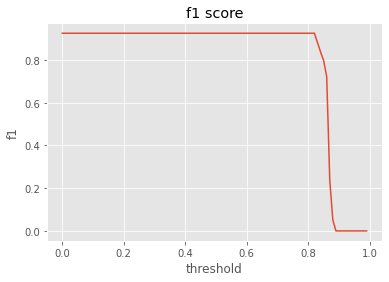

In [25]:
plt.plot(threshold_cl, f1_list_cl)
plt.title('f1 score')
plt.xlabel('threshold')
plt.ylabel('f1')


#### Using confusion matrix might be a better choice to choose the threshold, but due to the time limitation, we can only use f-1 score.

# ROC

In [26]:
# import libraries
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax

Best Threshold=0.852057, G-Mean=0.486


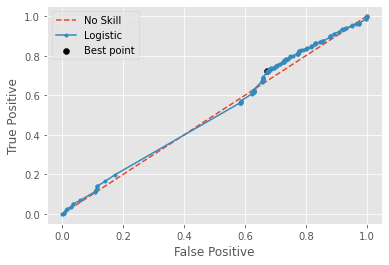

In [27]:
#ROC plot

fpr, tpr, thresholds = roc_curve(y_test, y_pred_pos)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best point')
# axis labels
pyplot.xlabel('False Positive')
pyplot.ylabel('True Positive')
pyplot.legend()
# show the plot
pyplot.show()

In [28]:
test_pclass1 = y_train.values

In [29]:
y_train

3533    1
4032    1
3371    1
1349    1
1790    1
       ..
3441    1
1344    1
4623    1
7293    1
1289    0
Name: Credit Rating, Length: 5656, dtype: int64

In [30]:
def to_labels_new(model_predict_pro, threshold, index):
    if test_pclass1[index] == 2: #for request high credit amount, the risk is low, so set the low threshold
        return (model_predict_pro >= (threshold-0.1)).astype('int').any()
    elif test_pclass1[index] == 0: #for request low credeit amount, the risk is high, so set the high threshold
        return (model_predict_pro >= (threshold+0.1)).astype('int').any()
    else: #else use the original thresholds
        return (model_predict_pro >= (threshold)).astype('int').any()

In [31]:
output = []
for i in range(len(X_test)):
    output.append(to_labels_new(y_pred_pos[i] , 0.8, i))

In [32]:
output

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True